In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
movies = pd.read_csv("movielens_converted.csv")
ratings = pd.read_csv("u_data_converted.csv")
users = pd.read_csv("u_user_converted.csv")
movies.isna().sum()
#checking null values

movieid                  0
title                    0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64


In [32]:
#doing data cleaning and filling the null values
movies.drop('video_release_date',axis=1,inplace=True)
#this column is removed since no data given
moveis['release_date'].fillna("27-Oct-1996")
movies.loc[266,'IMDb_URL'] = "https://www.imdb.com/title/tt0117509/"
movies.loc[1358,'IMDb_URL'] ="https://www.imdb.com/title/tt0645145/"
movies.loc[1359,'IMDb_URL'] = "https://www.imdb.com/title/tt0211986/"
movies[movies['IMDb_URL'].isna())

movieid         0
title           0
release_date    0
IMDb_URL        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [6]:
print(ratings)

       userId  movieid  rating  timestamp          timestamps
0         196      242       3  881250949 1997-12-04 15:55:49
1         186      302       3  891717742 1998-04-04 19:22:22
2          22      377       1  878887116 1997-11-07 07:18:36
3         244       51       2  880606923 1997-11-27 05:02:03
4         166      346       1  886397596 1998-02-02 05:33:16
...       ...      ...     ...        ...                 ...
99995     880      476       3  880175444 1997-11-22 05:10:44
99996     716      204       5  879795543 1997-11-17 19:39:03
99997     276     1090       1  874795795 1997-09-20 22:49:55
99998      13      225       2  882399156 1997-12-17 22:52:36
99999      12      203       3  879959583 1997-11-19 17:13:03

[100000 rows x 5 columns]


In [4]:
print(movies)

      movieid                                      title release_date  \
0           1                           Toy Story (1995)     1-Jan-95   
1           2                           GoldenEye (1995)     1-Jan-95   
2           3                          Four Rooms (1995)     1-Jan-95   
3           4                          Get Shorty (1995)     1-Jan-95   
4           5                             Copycat (1995)     1-Jan-95   
...       ...                                        ...          ...   
1677     1678                          Mat' i syn (1997)     6-Feb-98   
1678     1679                           B. Monkey (1998)     6-Feb-98   
1679     1680                       Sliding Doors (1998)     1-Jan-98   
1680     1681                        You So Crazy (1994)     1-Jan-94   
1681     1682  Scream of Stone (Schrei aus Stein) (1991)     8-Mar-96   

      video_release_date                                           IMDb_URL  \
0                    NaN  http://us.imdb.com

In [4]:
#Merging the movies and rating dataset so that we can analyze what users actually rated.
ratings['timestamps'] = pd.to_datetime(ratings['timestamp'],unit='s')
#Converting it helps us analyze trends over time, like ratings per month/year.
merged_df = ratings.merge(movies, on='movieid')
print(merged_df)

       userId  movieid  rating  timestamp          timestamps  \
0         196      242       3  881250949 1997-12-04 15:55:49   
1         186      302       3  891717742 1998-04-04 19:22:22   
2          22      377       1  878887116 1997-11-07 07:18:36   
3         244       51       2  880606923 1997-11-27 05:02:03   
4         166      346       1  886397596 1998-02-02 05:33:16   
...       ...      ...     ...        ...                 ...   
99995     880      476       3  880175444 1997-11-22 05:10:44   
99996     716      204       5  879795543 1997-11-17 19:39:03   
99997     276     1090       1  874795795 1997-09-20 22:49:55   
99998      13      225       2  882399156 1997-12-17 22:52:36   
99999      12      203       3  879959583 1997-11-19 17:13:03   

                              title release_date  video_release_date  \
0                      Kolya (1996)    24-Jan-97                 NaN   
1          L.A. Confidential (1997)     1-Jan-97                 NaN   
2  

In [5]:
merged_df[merged_df['release_date'].isnull()]
merged_df = merged_df[merged_df['title'] != 'unknown']

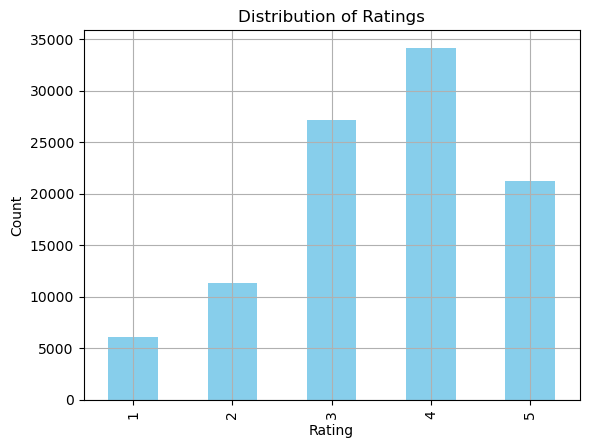

In [85]:
#Visualization of Movie Data
#Distribution of Movie Ratings
ratings['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()


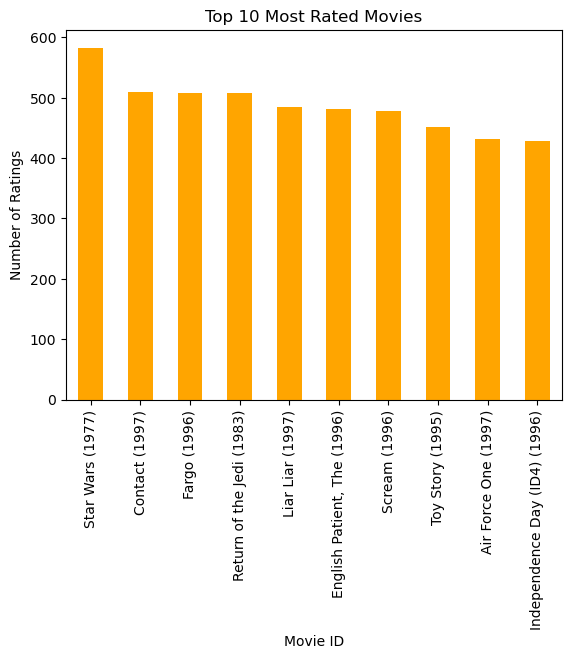

In [35]:
#Top 10 Most Rated Movies(Based of number of Ratings)
top_movies = merged_df['title'].value_counts().head(10)  # combined the title and the movie id logic
top_movies.plot(kind='bar', color='orange')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()


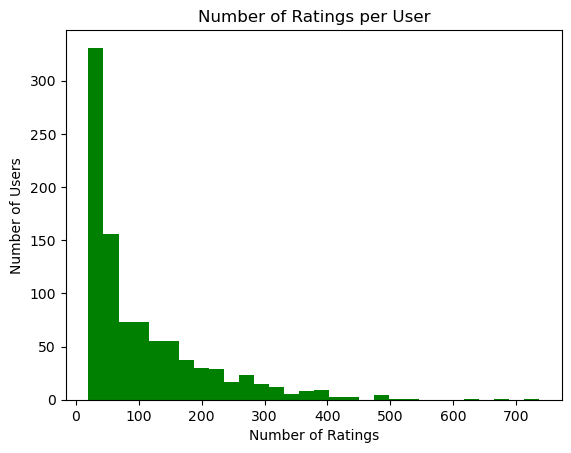

In [30]:
# How many ratings has each user given? (user activity)
# Why: Helps spot very active users or inactive ones — can affect collaborative filtering.
ratings_per_user = ratings['userId'].value_counts()
plt.hist(ratings_per_user, bins=30, color='green')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


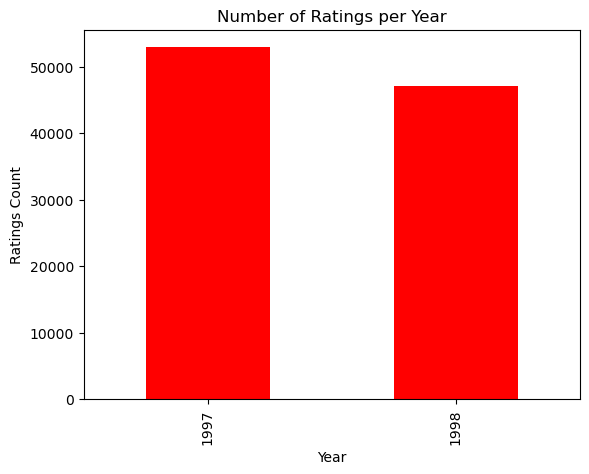

In [26]:
#Change of Ratings over time(Based on Year)
ratings['Year'] = ratings['timestamps'].dt.year
ratings['Year'].value_counts()
ratings['Year'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Number of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Ratings Count')
plt.show()
